# PART : 1

# Facial Expression classificaiton

In [1]:
#!pip install tensorflow tensorflow opencv-python matplotlib

In [2]:
#!pip list

In [3]:
import tensorflow as tf
from tensorflow import keras
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\hp\AppData\Local\Temp\ipykernel_480\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir =  'C:\\Users\\hp\\Image classifier\\data\\'

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
num_obs = [0,0]
class_idx = -1
for image_class in os.listdir(data_dir):
    class_idx = class_idx + 1
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
            else:
                num_obs[class_idx] = num_obs[class_idx] + 1
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
# build data from directories of images
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
data = tf.keras.utils.image_dataset_from_directory(data_dir)#This line calls the image_dataset_from_directory() function from TensorFlow's Keras utilities. It creates a dataset from image files in the specified directory (data_dir). The dataset will have labels automatically inferred from the directory structure.

Found 307 files belonging to 2 classes.


In [12]:
class_names = data.class_names #This line retrieves the class names from the data object. The data object is likely a dataset created using TensorFlow's image_dataset_from_directory() function. The class_names attribute of this dataset contains a list of the class names inferred from the directory structure where the images are stored.
print(class_names) 

['happy', 'sad']


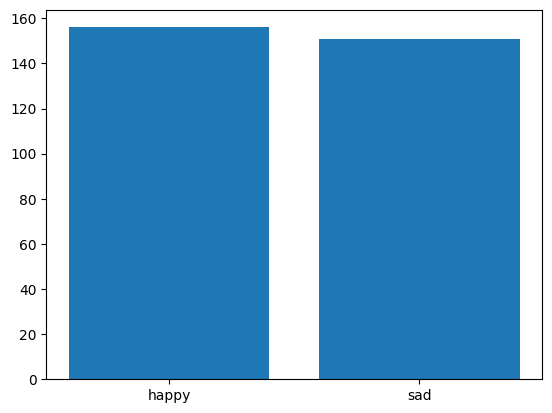

In [13]:
plt.bar([class_names[0],class_names[1]], num_obs);

In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
batch

(array([[[[ 17.       ,  17.       ,  17.       ],
          [ 17.       ,  17.       ,  17.       ],
          [ 17.       ,  17.       ,  17.       ],
          ...,
          [  9.       ,   9.       ,   9.       ],
          [  9.       ,   9.       ,   9.       ],
          [  9.       ,   9.       ,   9.       ]],
 
         [[ 17.       ,  17.       ,  17.       ],
          [ 17.       ,  17.       ,  17.       ],
          [ 17.       ,  17.       ,  17.       ],
          ...,
          [  9.       ,   9.       ,   9.       ],
          [  9.       ,   9.       ,   9.       ],
          [  9.       ,   9.       ,   9.       ]],
 
         [[ 17.       ,  17.       ,  17.       ],
          [ 17.       ,  17.       ,  17.       ],
          [ 17.       ,  17.       ,  17.       ],
          ...,
          [  9.       ,   9.       ,   9.       ],
          [  9.       ,   9.       ,   9.       ],
          [  9.       ,   9.       ,   9.       ]],
 
         ...,
 
         [[1

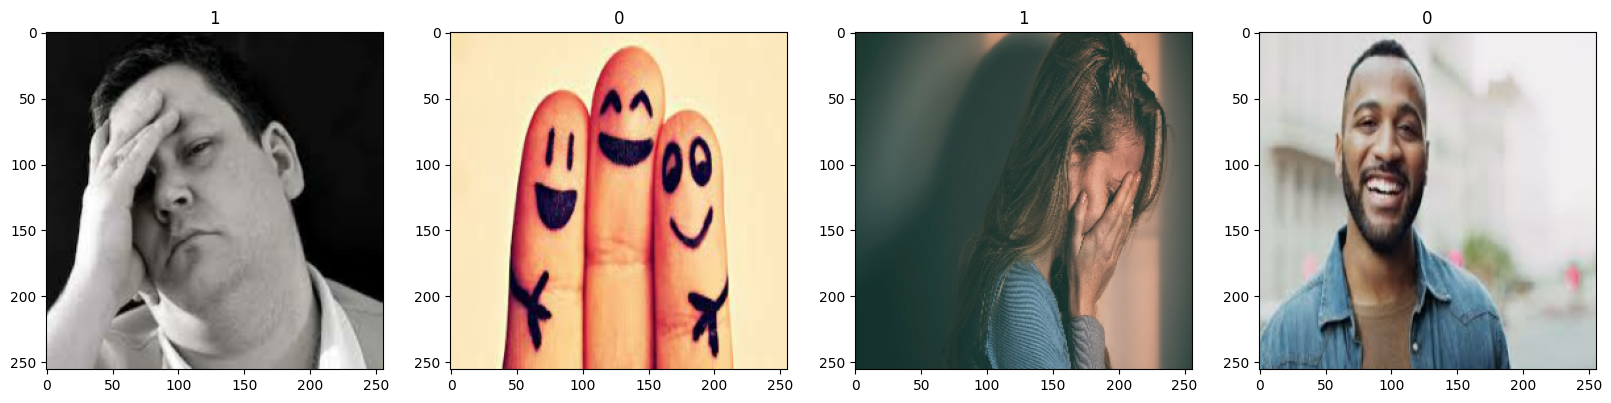

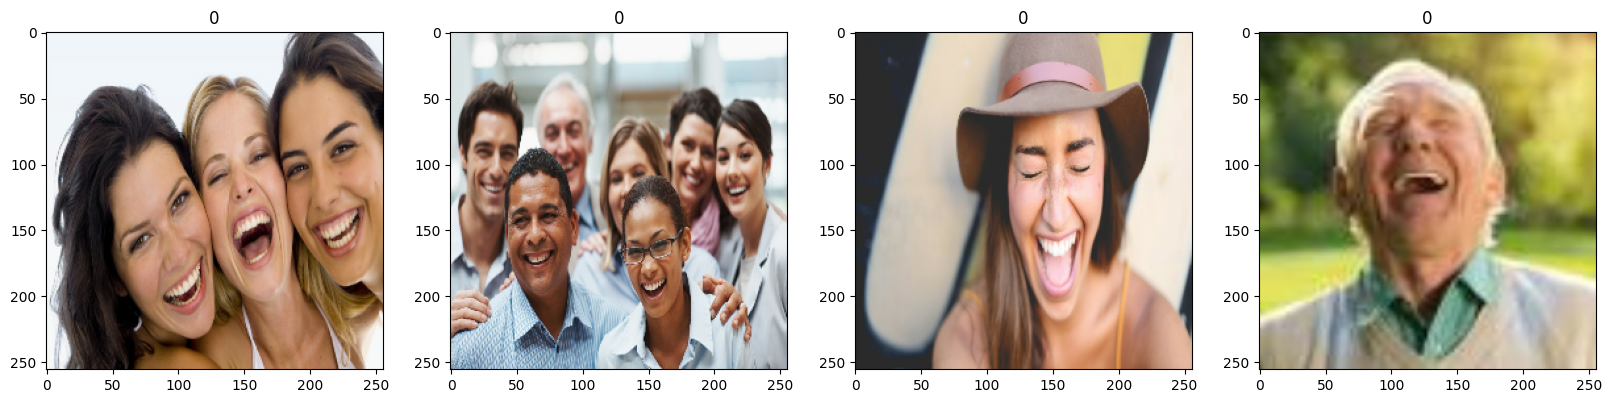

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][4:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][4+idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
data.as_numpy_iterator().next()

(array([[[[2.11764708e-01, 1.68627456e-01, 1.45098045e-01],
          [2.11764708e-01, 1.68627456e-01, 1.45098045e-01],
          [2.13066787e-01, 1.69929534e-01, 1.46400124e-01],
          ...,
          [8.20909917e-01, 7.66007960e-01, 7.30713844e-01],
          [7.31678903e-01, 6.73636615e-01, 6.50903821e-01],
          [7.06142783e-01, 6.47319257e-01, 6.27711415e-01]],
 
         [[2.11764708e-01, 1.68627456e-01, 1.45098045e-01],
          [2.11764708e-01, 1.68627456e-01, 1.45098045e-01],
          [2.13066787e-01, 1.69929534e-01, 1.46400124e-01],
          ...,
          [8.22270811e-01, 7.67368853e-01, 7.32074738e-01],
          [7.45136738e-01, 6.87094450e-01, 6.64361656e-01],
          [7.24343896e-01, 6.65520370e-01, 6.45912528e-01]],
 
         [[2.11764708e-01, 1.68627456e-01, 1.45098045e-01],
          [2.11764708e-01, 1.68627456e-01, 1.45098045e-01],
          [2.13066787e-01, 1.69929534e-01, 1.46400124e-01],
          ...,
          [8.23788822e-01, 7.68886864e-01, 7.3359

# 5. Split Data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
val_size 

2

In [23]:
test_size 

1

In [24]:
train_size

7

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 6. Build Deep Learning Model

In [27]:
n_epochs = 8

In [28]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [33]:
model.compile('adam',
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model.fit(train, epochs=n_epochs, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5044 - loss: 1.6349 - precision: 0.4835 - recall: 0.3709 - val_accuracy: 0.4688 - val_loss: 0.6952 - val_precision: 0.4688 - val_recall: 1.0000
Epoch 2/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4880 - loss: 0.6984 - precision: 0.4468 - recall: 0.3563 - val_accuracy: 0.6875 - val_loss: 0.6298 - val_precision: 0.6200 - val_recall: 0.9688
Epoch 3/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6570 - loss: 0.6244 - precision: 0.6428 - recall: 0.7183 - val_accuracy: 0.6250 - val_loss: 0.5922 - val_precision: 1.0000 - val_recall: 0.2000
Epoch 4/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7015 - loss: 0.5718 - precision: 0.7697 - recall: 0.5729 - val_accuracy: 0.7812 - val_loss: 0.4484 - val_precision: 1.0000 - val_recall: 0.5000
Epoch 5/8
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7422 - loss: 0.4716 - precision: 0.8226 - recall: 0.6035 - val_accuracy: 0.7188 - val_loss: 0.4336 - val_precision: 0.9

# 8. Plot Performance

In [38]:
 def plot_metrics(history, class_names):
    # percision = fraction of predicted 'trues' that are correct
    # recall = fraction of 'trues' that were found
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,6))
    ls = ['-','--','.']
    j = 0
    for hist in history:
        metric_names = list(hist.history.keys())
        for idx in range(2):
            ax[0,idx].plot(hist.history[metric_names[idx]], color='teal', linestyle=ls[j], label=metric_names[idx])
            ax[0,idx].plot(hist.history['val_'+metric_names[idx]], color='orange', linestyle=ls[j], label='val_'+metric_names[idx])
            ax[0,idx].set_title(metric_names[idx], fontsize=10)
            ax[0,idx].legend()
        for idx in range(2):
            ax[1,idx].plot(hist.history[metric_names[idx+2]], color='teal', linestyle=ls[j], label=metric_names[idx+2])
            ax[1,idx].plot(hist.history['val_'+metric_names[idx+2]], color='orange', linestyle=ls[j], label='val_'+metric_names[idx+2])
            ax[1,idx].set_title(metric_names[idx+2], fontsize=10)
            ax[1,idx].legend()
        j = j + 1
    fig.suptitle('Evaluation Metrics - '+class_names[0]+' vs '+class_names[1], fontsize=20)

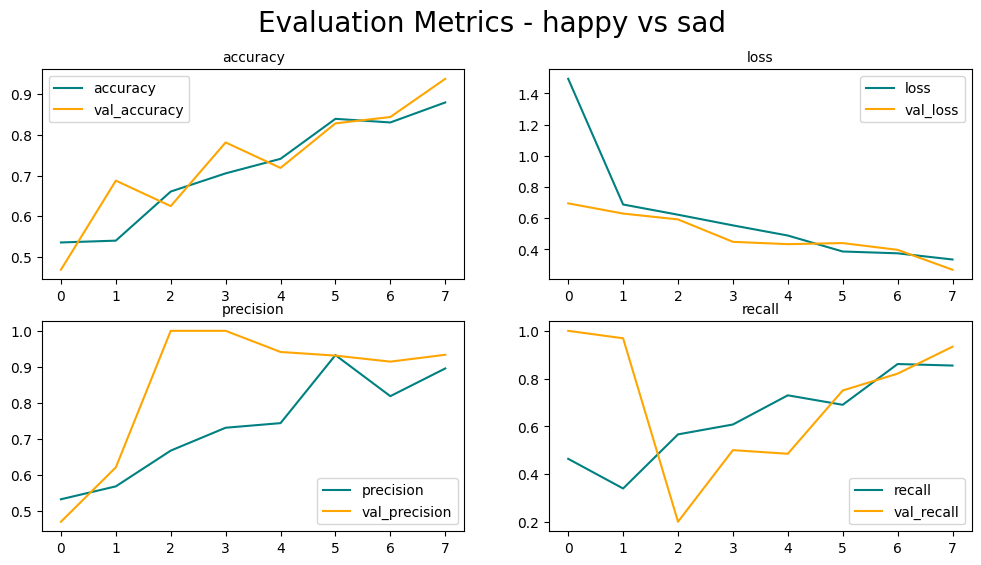

In [39]:
plot_metrics([hist], class_names)

In [40]:
# save the history from validating this model for future comparison
base_model_hist = hist

# 9. Evaluate

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


In [44]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.90909094, shape=(), dtype=float32) tf.Tensor(0.90909094, shape=(), dtype=float32) tf.Tensor(0.8947368, shape=(), dtype=float32)


# 10. Test

In [45]:
import cv2

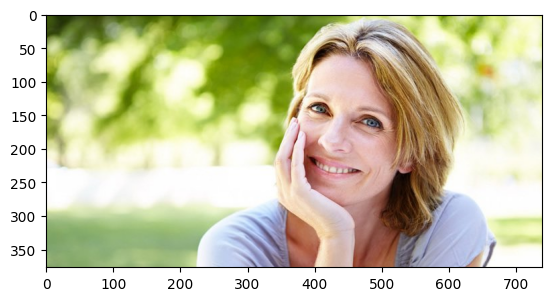

In [46]:
img = cv2.imread('C:\\Users\\hp\\Image classifier\\data\\happy\\11-Habits-of-Truly-Happy-People.jpg')
img = 255-cv2.cvtColor(255-img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

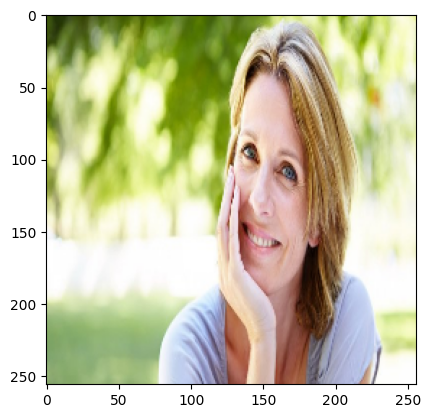

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


In [49]:
print(yhat)

[[0.3607982]]


In [50]:
if yhat < 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy


# 11. Save the Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
mode_fname = os.path.join('models','imageclassifier.h5')
model.save(mode_fname)

In [53]:
new_model = load_model(mode_fname)

In [54]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


array([[0.3607982]], dtype=float32)

In [55]:
if yhat < 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy


# Gui 

In [56]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import ImageTk, Image
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('C:\\Users\\hp\\Image classifier\\models\\imageclassifier.h5')

# Define classes
classes = ['happy', 'sad']


# Function to classify image
def classify_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path).resize((256, 256))
        img = img.convert("RGB")
        img = np.array(img)  # Convert PIL image to NumPy array
        img = np.expand_dims(img, axis=0)
        img = img / 255.0  # Normalize
        prediction = model.predict(img)
        label = classes[int(np.round(prediction))]
        
        # Convert image to format compatible with Tkinter
        img = Image.fromarray(np.uint8(img[0]*255))
        img = ImageTk.PhotoImage(img)
        
        # Display the image
        image_label.config(image=img)
        image_label.image = img

        # Display the predicted emotion
        result_label.config(text=f"Predicted Emotion: {label}")

# Create GUI window
root = tk.Tk()
root.title("Image Emotion Classifier")

# Create Upload button
upload_btn = tk.Button(root, text="Upload Image", command=classify_image)
upload_btn.pack(pady=20)

# Create label to display the uploaded image
image_label = tk.Label(root)
image_label.pack(pady=10)

# Create label to display the predicted emotion
result_label = tk.Label()
result_label.pack(pady=5)

root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


C:\Users\hp\AppData\Local\Temp\ipykernel_480\328640115.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = classes[int(np.round(prediction))]


# PART : 2

# Real time emotion detection

In [66]:
!pip install opencv-python deepface numpy


  Using cached retina_face-0.0.17-py3-none-any.whl.metadata (10 kB)
     ---------------------------------------- 0.0/87.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/87.2 kB ? eta -:--:--
     -------------------------- ----------- 61.4/87.2 kB 550.5 kB/s eta 0:00:01
     -------------------------------------- 87.2/87.2 kB 706.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/108.6 kB ? eta -:--:--
   ---------------------------------------- 108.6/108.6 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.0 kB ? eta -:--:--
   ---------------------------------------- 85.0/85.0 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.9 MB 2.4 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/1.9 MB 1.9 MB/s eta 0:00:01
   --

In [ ]:
import cv2
from deepface import DeepFace

def detect_emotions():
    # Open the webcam
    cap = cv2.VideoCapture(0)
    
    while True:
        # Read frame from webcam
        ret, frame = cap.read()
        if not ret:
            break
        
        try:
            # Analyze emotions in the frame
            analysis = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            
            if isinstance(analysis, list) and len(analysis) > 0:
                dominant_emotion = analysis[0]['dominant_emotion']
                
                # Display detected emotion
                cv2.putText(frame, dominant_emotion, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        except Exception as e:
            print(f"Error: {e}")
        
        # Display the frame
        cv2.imshow('Real-Time Emotion Detection', frame)
        
        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release resources
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect_emotions()


25-02-11 19:36:21 - Directory C:\Users\hp\.deepface has been created
25-02-11 19:36:21 - Directory C:\Users\hp\.deepface\weights has been created
25-02-11 19:36:25 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\hp\.deepface\weights\facial_expression_model_weights.h5
100%|██████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:25<00:00, 237kB/s]


In [ ]:
import cv2
import csv
import time
import pyttsx3
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np
import os
import random

def log_emotion(emotion, confidence):
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S')
    with open('emotion_log.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([timestamp, emotion, confidence])

def speak_emotion(emotion):
    engine = pyttsx3.init()
    engine.say(f"You look {emotion}")
    engine.runAndWait()

def save_snapshot(frame, emotion):
    directory = "emotion_snapshots"
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = os.path.join(directory, f"{emotion}_{int(time.time())}.jpg")
    cv2.imwrite(filename, frame)

def play_music(emotion):
    music_dict = {
        "happy": ["happy_song1.mp3", "happy_song2.mp3"],
        "sad": ["sad_song1.mp3", "sad_song2.mp3"],
        "angry": ["angry_song1.mp3", "angry_song2.mp3"],
    }
    if emotion in music_dict:
        os.system(f"start {random.choice(music_dict[emotion])}")

def detect_emotions():
    cap = cv2.VideoCapture(0)
    emotion_history = []
    plt.ion()
    fig, ax = plt.subplots()
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        try:
            analysis = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            
            if isinstance(analysis, list) and len(analysis) > 0:
                emotions = analysis[0]['emotion']
                dominant_emotion = max(emotions, key=emotions.get)
                confidence = emotions[dominant_emotion]
                
                text = f"{dominant_emotion}: {confidence:.2f}%"
                cv2.putText(frame, text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                
                log_emotion(dominant_emotion, confidence)
                speak_emotion(dominant_emotion)
                
                if dominant_emotion in ["happy", "sad", "angry"]:
                    play_music(dominant_emotion)
                    save_snapshot(frame, dominant_emotion)
                
                emotion_history.append((time.time(), dominant_emotion))
                if len(emotion_history) > 20:
                    emotion_history.pop(0)
                
                ax.clear()
                ax.hist([e[1] for e in emotion_history], bins=np.arange(-0.5, len(set(emotion_history)), 1.5)-0.5, rwidth=0.8)
                ax.set_title("Emotion Frequency Over Time")
                plt.draw()
                plt.pause(0.1)
        except Exception as e:
            print(f"Error: {e}")
        
        cv2.imshow('Real-Time Emotion Detection', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    plt.ioff()
    plt.show()

if __name__ == "__main__":
    detect_emotions()
